In [2]:
import math

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression,LogisticRegression
from IPython.display import Image

sns.set()

## Create synthetic dataset

In [3]:
# Create x and y
x, y = make_regression(
    n_samples=100,
    n_features=1,
    n_targets=1,
    n_informative=1,
    noise=5.5,
    bias=0,
    random_state=124
)

## Problem

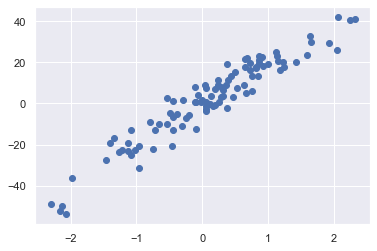

In [20]:
# Plot
plt.scatter(x, y)

## Model

Linear regression model

$$
\begin{aligned}
y &= \beta_0 + \beta_1x_1 + ... + \beta_nx_n + \epsilon \\
y &= X\beta + \epsilon \\
Est.:     \hat y &= X\hat\beta
\end{aligned}
$$

## Estimating the Model Parameters

### How MLer would do it

Define a function to describe the deviation from predicted and true values and call it Loss Function:

$$RSS = \sum (y - \hat{y})^2$$

Minimize this function to obtain the parameters to best describe the data at hand:

$$\underset{\hat \beta_0,\hat \beta_1}{\operatorname{argmin}} RSS$$

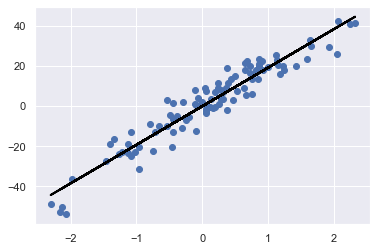

In [22]:
# Scatterplot with estimated regression line
reg = LinearRegression(fit_intercept=True).fit(x, y)
y_pred = reg.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color='black', linewidth=2)

### How Statisticians would do it

Assume that the data are conditionally normal distributed and described by the paramters $\mu$ and $\sigma$: 

$$
y|X\beta \sim N(\mu,\sigma)
$$

Try to find the parameters that maximize the likelihood of the data to be observed under this specific model, called Maximum Likelihood Estimate (MLE).

#### MLE

As a probabilistic framework for estimating the parameters of a model, we start with:

$$
\begin{align}
P(X&|\theta) \\
P(x_1,...,x_n&|\theta)
\end{align}
$$

the joint distribution of the data $X$ given a set of parameters $\theta$. 

This probability is also known as the Likelihood (of the data):

$$
L(X|\theta)
$$

The likelihood of the data is calculated by evaluating the log likelihood function for each data point and sum it up. 

$$
\log L(X|\theta) = \sum_{i=1}^n \log L(x_i|\theta)
$$

#### MLE for the Normal Distribution

Assuming a normal distribution of the data with $\theta=\{\mu=0,\sigma=1\}$ and observations of $X=\{1,2,3\}$ would look like:

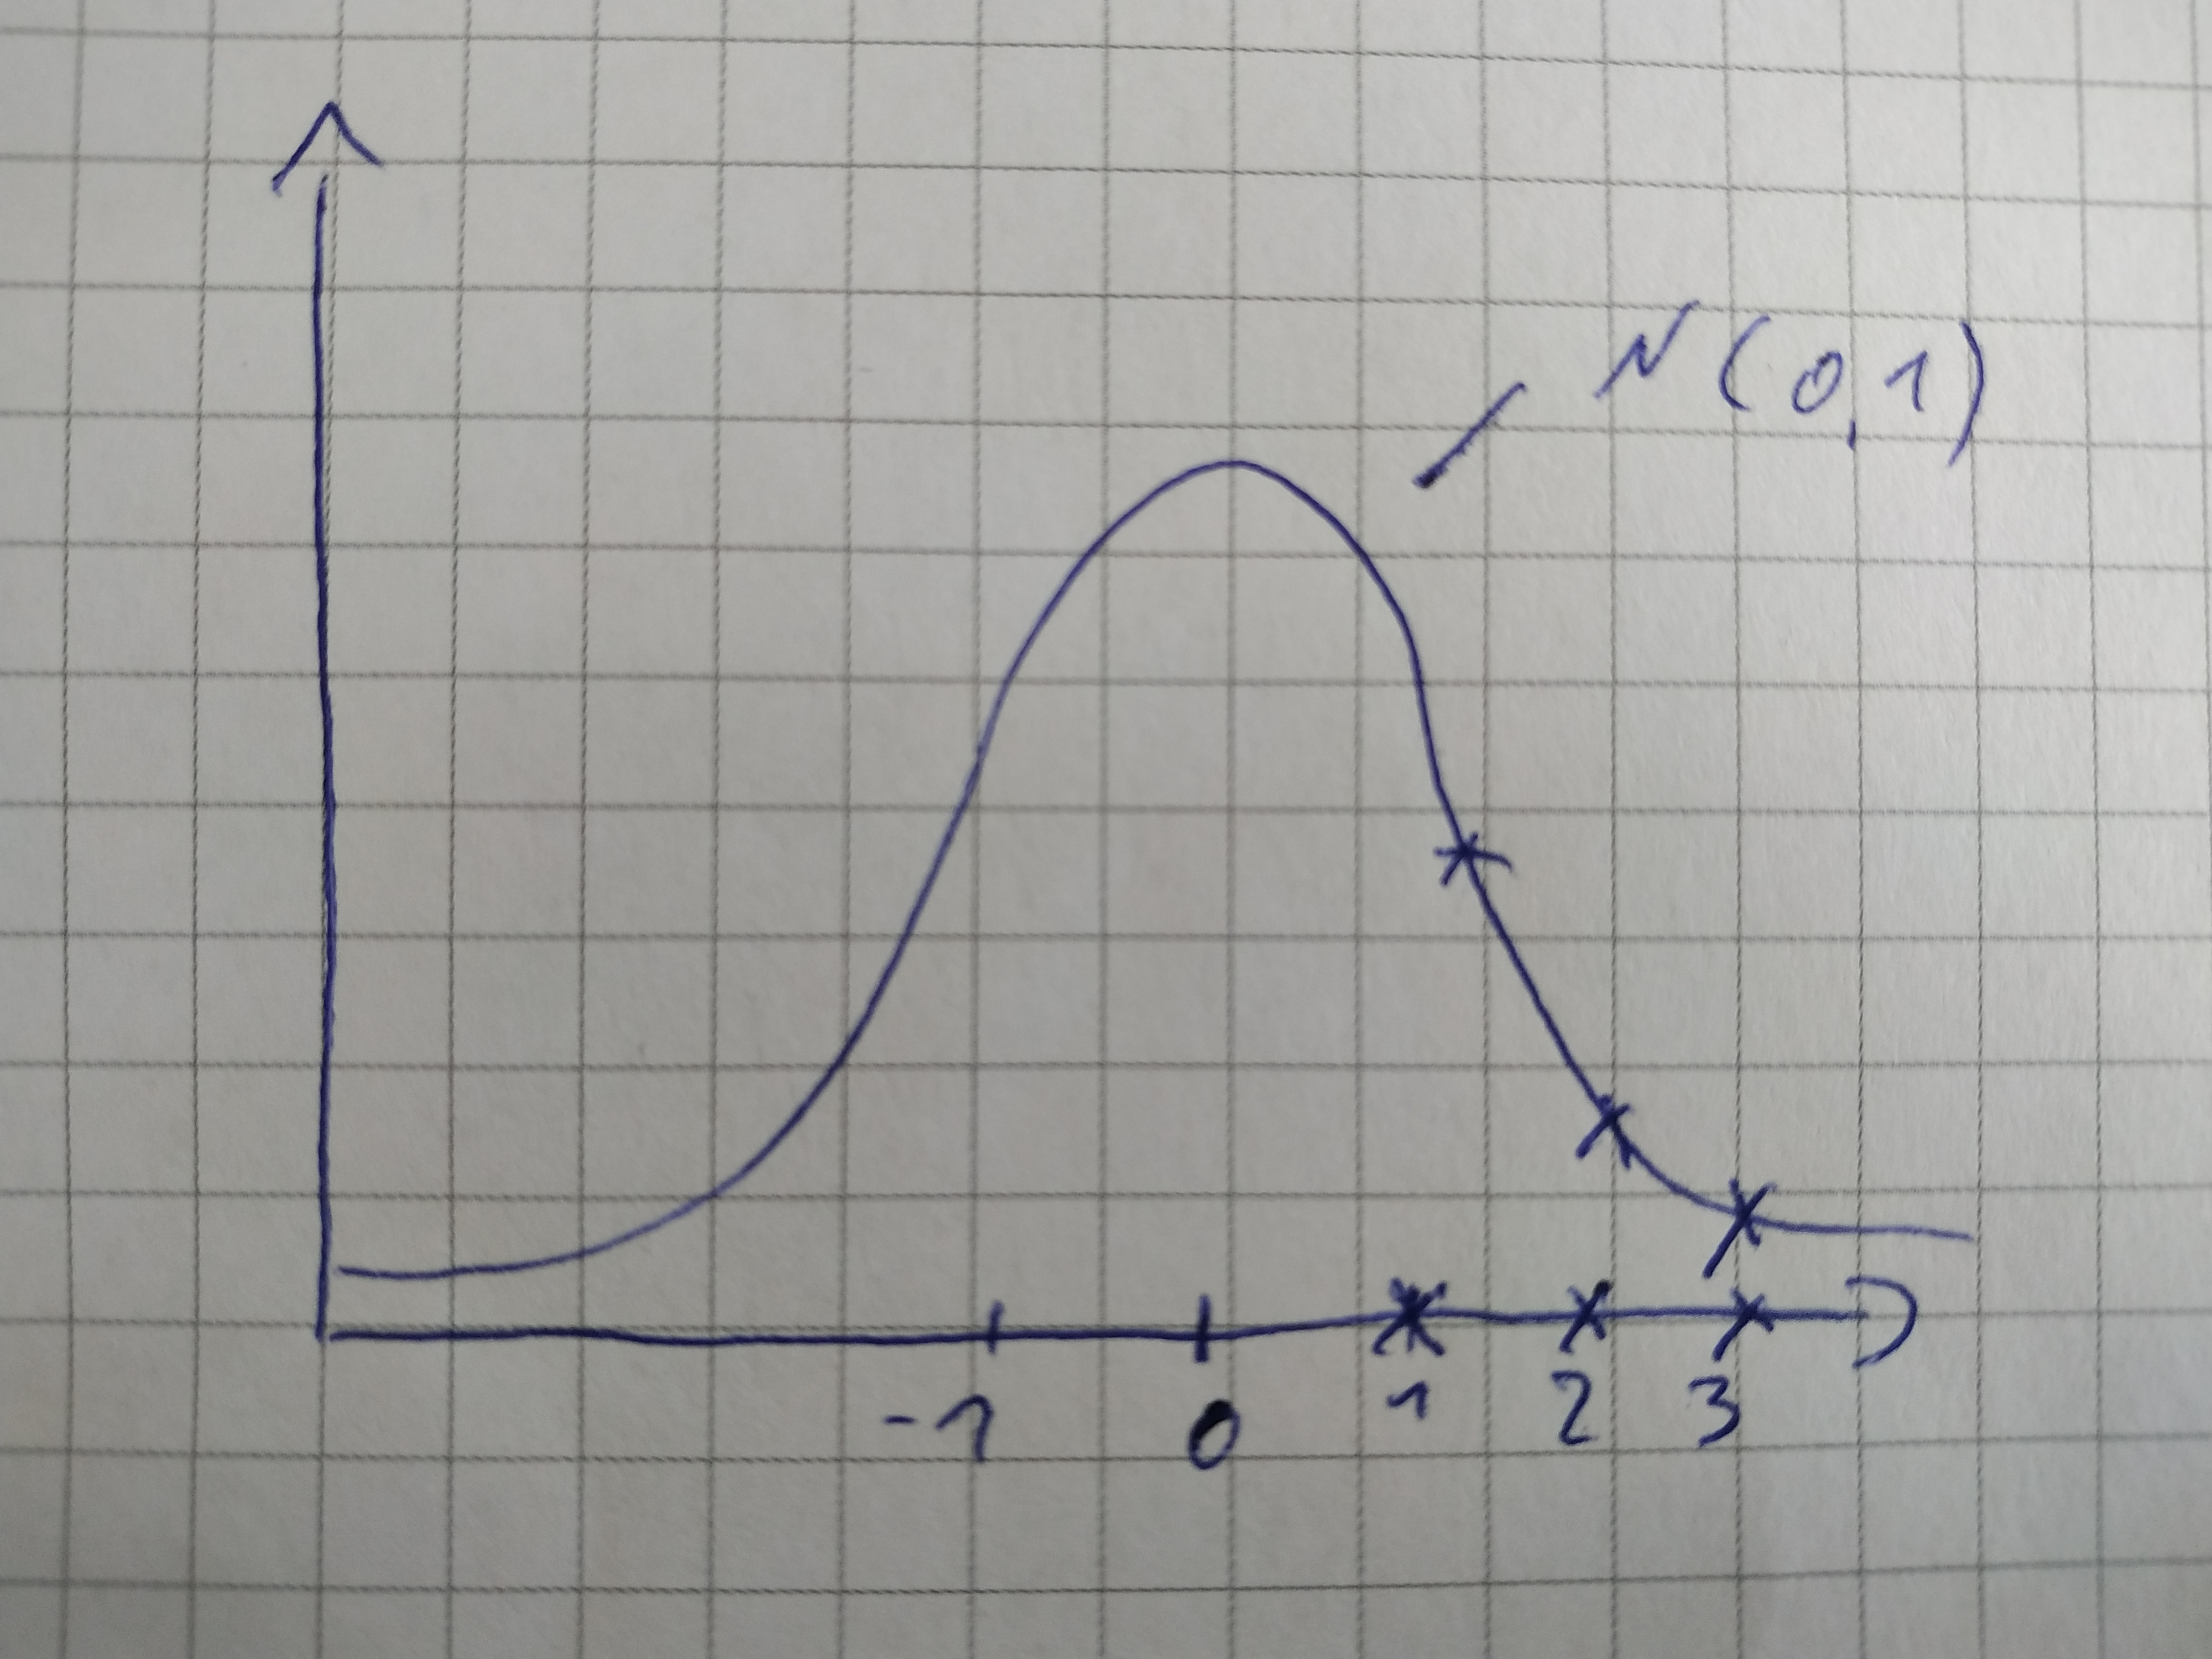

In [23]:
# Plot normal distribution with points on the axis
Image("img/likelihood_gaussian.jpg",width=400)

The log likelihood is computed as:

$$
\sum_{i=1}^n \log L(x_i|\mu,\sigma)=-{\frac {n}{2}}\log \left(2\pi \sigma ^{2}\right)-{\frac {1}{2\sigma ^{2}}}\sum _{i=1}^{n}(x_{i}-\mu )^{2}
$$

In [9]:
mu=2
sigma=1

X=np.array([1,2,3])
n=len(X)

ll = -(n/2)*math.log(2*math.pi*(sigma**2)) - (1/(2 * (sigma**2)))*np.sum(((X-mu)**2))
ll

-3.756815599614018

Now find the parameters that maximize the log likelihood function

$$
\underset{\mu,\sigma}{\operatorname{argmin}} -(\sum_{i=1}^n \log L(x_i|\mu,\sigma))
$$

#### MLE for the linear Regression Model

Take equations from: https://medium.com/quick-code/maximum-likelihood-estimation-for-regression-65f9c99f815d

### How Bayesian Statisticians would do it